### Check that fields from CPL hist file match those from MOM6

#### bmom.e23.f09_t061_zstar_N65.mct.mct_short.001
This is a 3 day run using BMOM with *_NCPL=48. Saving MOM6 and CPL hist. snapshots. We expect round off level differences between CPL and MOM. 

In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6plot import xyplot

Basemap module not found. Some regional plots may not function properly


In [2]:
path= '/glade/scratch/gmarques/bmom.e23.f09_t061_zstar_N65.mct.mct_short.001/run/'
grd = MOM6grid(path+'bmom.e23.f09_t061_zstar_N65.mct.mct_short.001.mom6.static.nc')
area = np.ma.masked_where(grd.wet==0,grd.area_t)
grd_xr = MOM6grid(path+'bmom.e23.f09_t061_zstar_N65.mct.mct_short.001.mom6.static.nc', xrformat=True)

MOM6 grid successfully loaded... 

MOM6 grid successfully loaded... 



### MOM6 forcing data

In [3]:
ds_mom =  xr.open_dataset(path+'bmom.e23.f09_t061_zstar_N65.mct.mct_short.001.mom6.frc_0001.nc')

### CPL history data

In [4]:
ds_cpl = xr.open_mfdataset(path+'bmom.e23.f09_t061_zstar_N65.mct.mct_short.001.cpl.hi.0001-01-0?-00000.nc')

In [5]:
#ds_cpl

In [6]:
C_P = 3992.0 
latent_heat_fusion = 3.337E+05
latent_heat_vapor = 2.501E+06

In [7]:
n=0
# areas
#earth_rad = 6.37122e6 # in m (from shr_constants)
earth_rad = 6.378e6 # in m (from MOM6)

# areas
domo_aream = np.ma.masked_invalid(ds_cpl.domo_aream[n,:].values)
domo_area = np.ma.masked_invalid(ds_cpl.domo_area[n,:].values)
norm = domo_aream/domo_area
model_area = grd.area_t / (earth_rad**2)
#med2mod_areacor = med_area/model_area
#mod2med_areacor = model_area/med_area

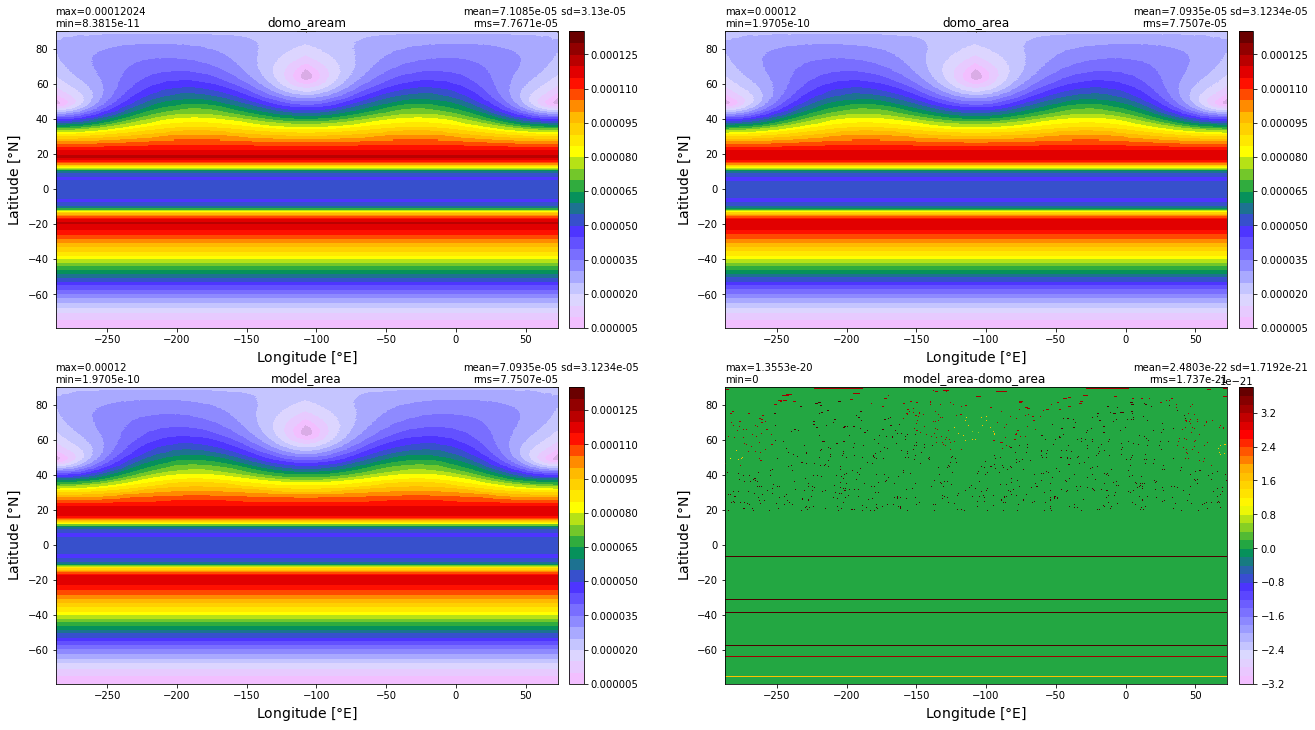

In [8]:
%matplotlib inline

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(22,12))
ax1 = ax.flatten()

xyplot(domo_aream,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='domo_aream')
xyplot(domo_area,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='domo_area')
xyplot(model_area,grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], title='model_area')
xyplot(model_area-domo_area,grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], title='model_area-domo_area ')


In [9]:
# areas
#earth_rad = 6.37122e6 # in m (from shr_constants)
earth_rad = 6.378e6 # in m (from MOM6)

# areas
domo_aream_m = np.ma.masked_invalid(ds_cpl.domo_aream[n,:].values) * (earth_rad**2)
domo_area_m = np.ma.masked_invalid(ds_cpl.domo_area[n,:].values) * (earth_rad**2)
model_area_m = grd.area_t 
#med2mod_areacor = med_area/model_area
#mod2med_areacor = model_area/med_area

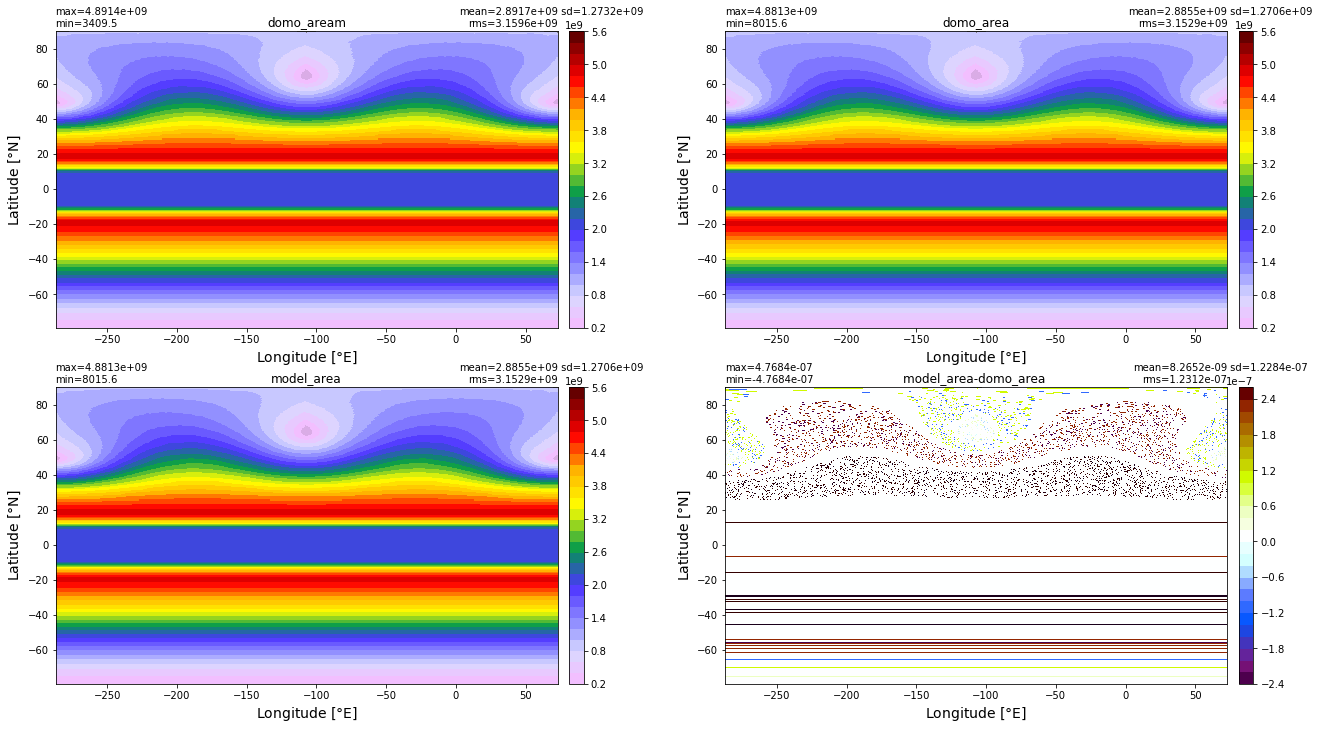

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(22,12))
ax1 = ax.flatten()

xyplot(domo_aream_m,grd.geolon, grd.geolat, grd.area_t, axis=ax1[0], title='domo_aream')
xyplot(domo_area_m,grd.geolon, grd.geolat, grd.area_t, axis=ax1[1], title='domo_area')
xyplot(model_area_m,grd.geolon, grd.geolat, grd.area_t, axis=ax1[2], title='model_area')
xyplot(model_area_m-domo_area_m,grd.geolon, grd.geolat, grd.area_t, axis=ax1[3], title='model_area-domo_area ')


### Budget table?

In [11]:
n=1
net_heat_surface = np.ma.masked_invalid(ds_mom.net_heat_surface[n,:].values)
net_heat_coupler_mom1 = np.ma.masked_invalid(ds_mom.net_heat_coupler[n,:].values)
sen_mom = np.ma.masked_invalid(ds_mom.sensible[n,:].values)
lat_mom = np.ma.masked_invalid(ds_mom.latent[n,:].values)
sw_mom = np.ma.masked_invalid(ds_mom.SW[n,:].values)
lw_mom = np.ma.masked_invalid(ds_mom.LW[n,:].values)
melth_mom = np.ma.masked_invalid(ds_mom.seaice_melt_heat[n,:].values)
net_heat_coupler_mom2 = sen_mom + lat_mom + sw_mom + lw_mom + melth_mom
frazil_mom = np.ma.masked_invalid(ds_mom.frazil[n,:].values)


heat_content_lrunoff = np.ma.masked_invalid(ds_mom.heat_content_lrunoff[n,:].values)
heat_content_frunoff = np.ma.masked_invalid(ds_mom.heat_content_frunoff[n,:].values)
heat_content_icemelt = np.ma.masked_invalid(ds_mom.heat_content_icemelt[n,:].values)
heat_content_lprec = np.ma.masked_invalid(ds_mom.heat_content_lprec[n,:].values)
heat_content_fprec = np.ma.masked_invalid(ds_mom.heat_content_fprec[n,:].values)
heat_content_cond = np.ma.masked_invalid(ds_mom.heat_content_cond[n,:].values)
heat_content_massout = np.ma.masked_invalid(ds_mom.heat_content_massout[n,:].values)
heat_content_massin = np.ma.masked_invalid(ds_mom.heat_content_massin[n,:].values)
heat_content_surfwater = np.ma.masked_invalid(ds_mom.heat_content_surfwater[n,:].values)
heat_pme_mom = np.ma.masked_invalid(ds_mom.Heat_PmE[n,:].values)

# mass
fprec_mom = np.ma.masked_invalid(ds_mom.fprec[n,:].values)
frunoff_mom = np.ma.masked_invalid(ds_mom.frunoff[n,:].values)
evap_mom = np.ma.masked_invalid(ds_mom.evap[n,:].values)

#sst_mom = np.ma.masked_invalid(sfc_mom.SST[n,:].values)
#sss_mom = np.ma.masked_invalid(sfc_mom.SSS[n,:].values)

In [12]:
# heat
lwdn_cpl= np.ma.masked_invalid(ds_cpl.x2oacc_Faxa_lwdn[n,:].values) * norm
sw_cpl  = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_swnet[n,:].values)* norm
lat_cpl = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_lat[n,:].values)* norm
sen_cpl = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_sen[n,:].values)* norm
lwup_cpl= np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_lwup[n,:].values)* norm
melth_cpl=np.ma.masked_invalid(ds_cpl.x2oacc_Fioi_melth[n,:].values)* norm
net_heat_coupler_cpl = lwdn_cpl+sw_cpl+lat_cpl+lwup_cpl+melth_cpl + sen_cpl

# mass
rofi = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_rofi[n,:].values)* norm
snow = np.ma.masked_invalid(ds_cpl.x2oacc_Faxa_snow[n,:].values)* norm
evap = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_evap[n,:].values)* norm
meltw = np.ma.masked_invalid(ds_cpl.x2oacc_Fioi_meltw[n,:].values)* norm
rain = np.ma.masked_invalid(ds_cpl.x2oacc_Faxa_rain[n,:].values)* norm
rofl = np.ma.masked_invalid(ds_cpl.x2oacc_Foxx_rofl[n,:].values)* norm


# o2x
q_cpl = np.ma.masked_invalid(ds_cpl.o2x_Fioo_q[n,:].values)
sst_cpl = np.ma.masked_invalid(ds_cpl.o2x_So_t[n,:].values) - 273.15
sss_cpl = np.ma.masked_invalid(ds_cpl.o2x_So_s[n,:].values) 

### SW

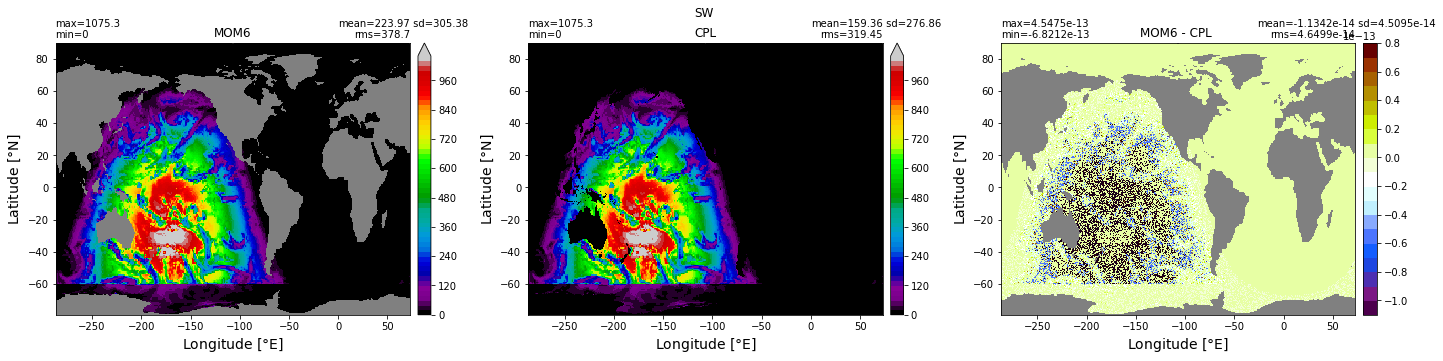

In [13]:
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('SW')
xyplot(sw_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(0,1057))
xyplot(sw_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(0,1057))
xyplot((sw_mom-sw_cpl), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL ', 
       axis=ax1[2])

### LW

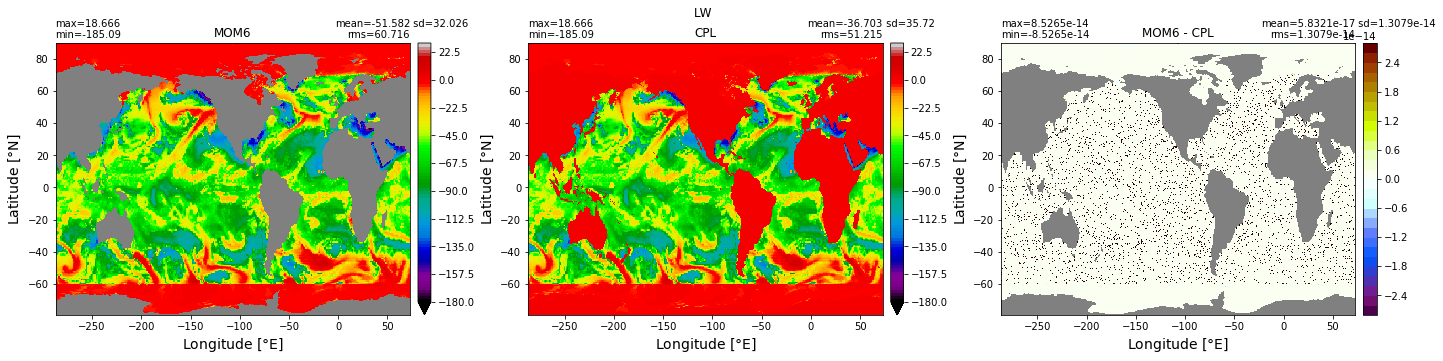

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('LW')
xyplot(lw_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-180,30))
xyplot(lwdn_cpl+lwup_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-180,30))
xyplot((lw_mom-(lwdn_cpl+lwup_cpl)), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])

### Sensible

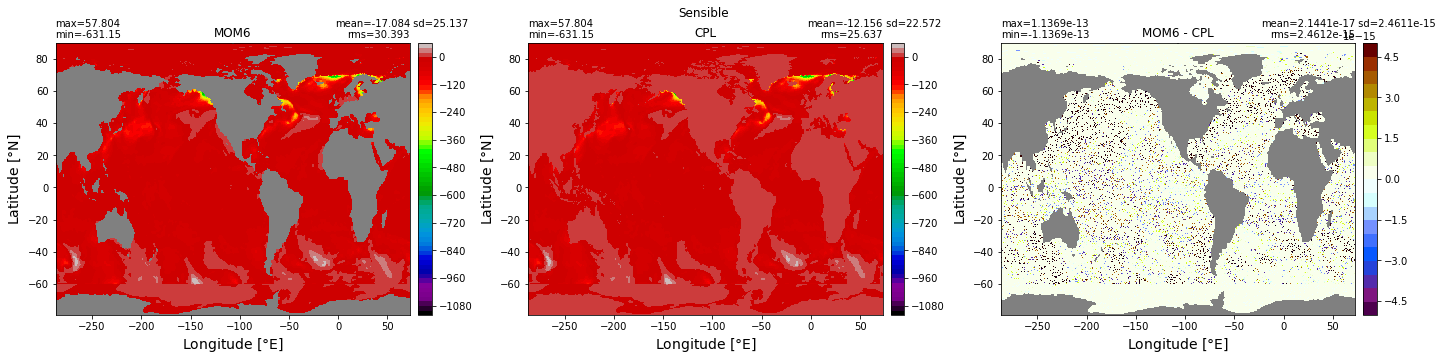

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,5))
ax1 = ax.flatten()
plt.suptitle('Sensible')
xyplot(sen_mom, grd.geolon, grd.geolat, grd.area_t, title='MOM6', 
       axis=ax1[0], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1110,60))
xyplot(sen_cpl, grd.geolon, grd.geolat, grd.area_t, title='CPL', 
       axis=ax1[1], nbins=100, colormap=plt.cm.nipy_spectral, clim=(-1110,60))
xyplot((sen_mom-sen_cpl), grd.geolon, grd.geolat, grd.area_t, title='MOM6 - CPL', 
       axis=ax1[2])